# Data Exploration

This notebook will show you how to examine data for simple classification

We'll go over:

* Downloading the data
* Examining the structure
* Exploring the data

In [1]:
from pathlib import Path
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import re

## Downloading the data

In [2]:
#!curl -o imagenette.tgz https://s3.amazonaws.com/fast-ai-imageclas/imagenette.tgz
!curl -o imagenette-160.tgz https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94.1M  100 94.1M    0     0  5308k      0  0:00:18  0:00:18 --:--:-- 7221k


In [3]:
%%capture
!tar xvzf ./imagenette-160.tgz

In [4]:
source = Path('./imagenette-160/')
destination = Path('./data')
source.rename(destination)

## Examining the structure 

In [5]:
path = Path('./data/train')

for d in path.iterdir():
    print(d.stem)

n03000684
n02102040
n03888257
n03445777
n03028079
n01440764
n03394916
n03417042
n02979186
n03425413


In [6]:
# change label names
labels = ['tench', 'english_springer', 'cassette_player', 'chain_saw', 'church', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute']
labels

['tench',
 'english_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'french_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [7]:
train_path = Path('./data/train')

for i, d in enumerate(sorted(train_path.iterdir())):
    d.rename('data/train/'+labels[i])

In [8]:
val_path = Path('./data/val')

for i, d in enumerate(sorted(val_path.iterdir())):
    d.rename('data/val/'+labels[i])

## Exploring the data

In [9]:
# list of images
images = []

# loop throuh labels and get the first image for that class
for label in labels:

    new_path=Path('data/train/'+label)
    img = plt.imread(list(new_path.iterdir())[0])
    images.append(img)
    #print(list(new_path.iterdir())[0])

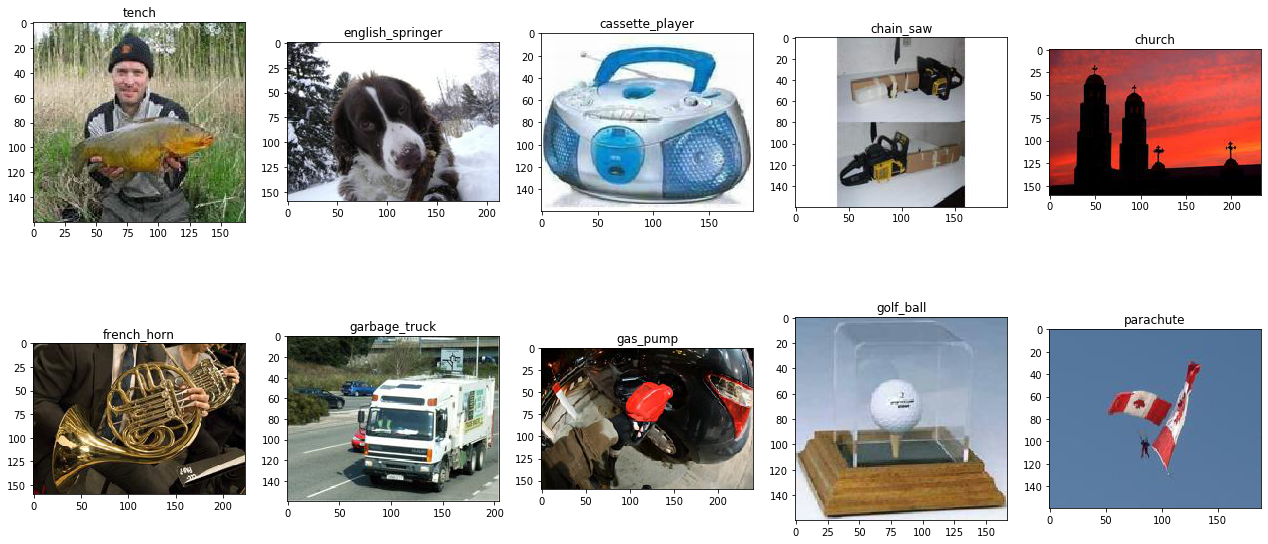

In [10]:
# create subplot and set figure size
fig, axarr = plt.subplots(2, 5, figsize=(22, 10))

# set index to loop through labels and images
x = 0

# loop through data to give 2 rows and 5 columns i = row j = column
for i in range(2):
    for j in range(5):
        axarr[i,j].set_title(labels[x])
        axarr[i,j].imshow(images[x])
        x+=1

In [11]:
# this function will count the amount of files in each subclass
def count_data(path):
    counts = []
    for i, label in enumerate(labels):
        count = len(list(Path(path+label).glob('**/*')))
        counts.append(count)
    return counts

In [12]:
# gets the counts of the objects
train_counts = count_data('data/train/')
val_counts = count_data('data/val/')

In [13]:
# creates a dataset four our counts that seaborn can use for a bar chart
train_dataset = pd.DataFrame({'labels':labels,'count':train_counts})
train_dataset.head(5)

,labels,count
0,tench,1300
1,english_springer,1300
2,cassette_player,1300
3,chain_saw,1194
4,church,1300


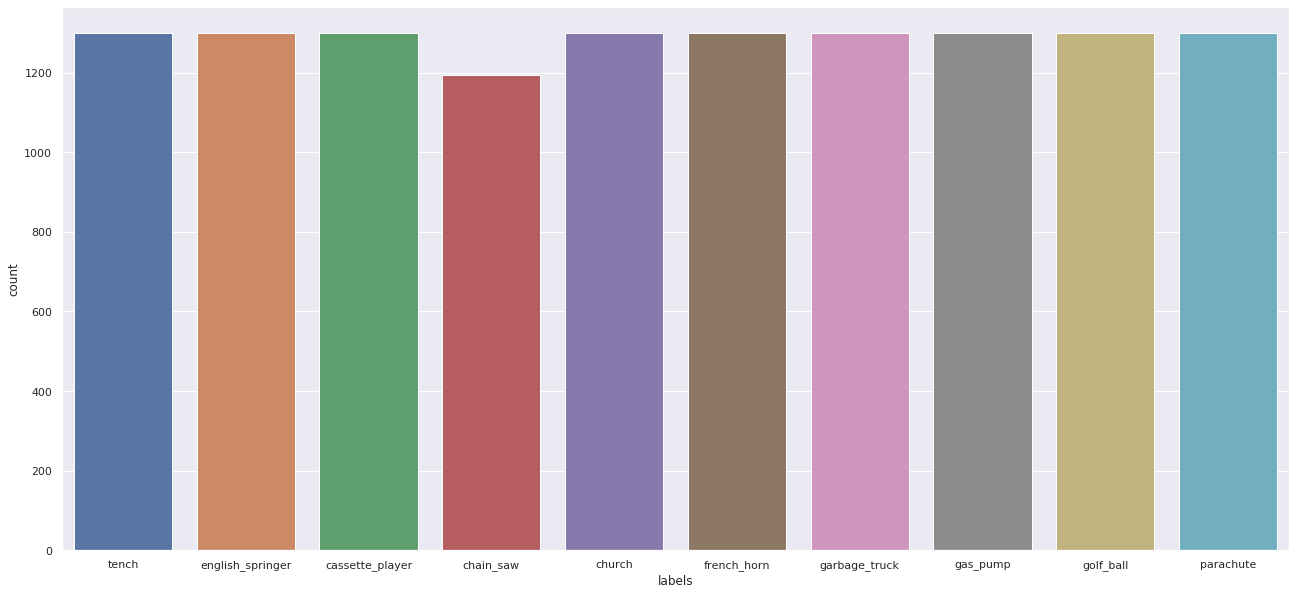

In [14]:
# this bar is created using the pandas dataframe
sns.set(rc={'figure.figsize':(22,10)})
sns.barplot(x="labels", y="count", data=train_dataset);

In [15]:
val_dataset = pd.DataFrame({'labels':labels,'count':val_counts})
val_dataset.head(5)

,labels,count
0,tench,50
1,english_springer,50
2,cassette_player,50
3,chain_saw,50
4,church,50


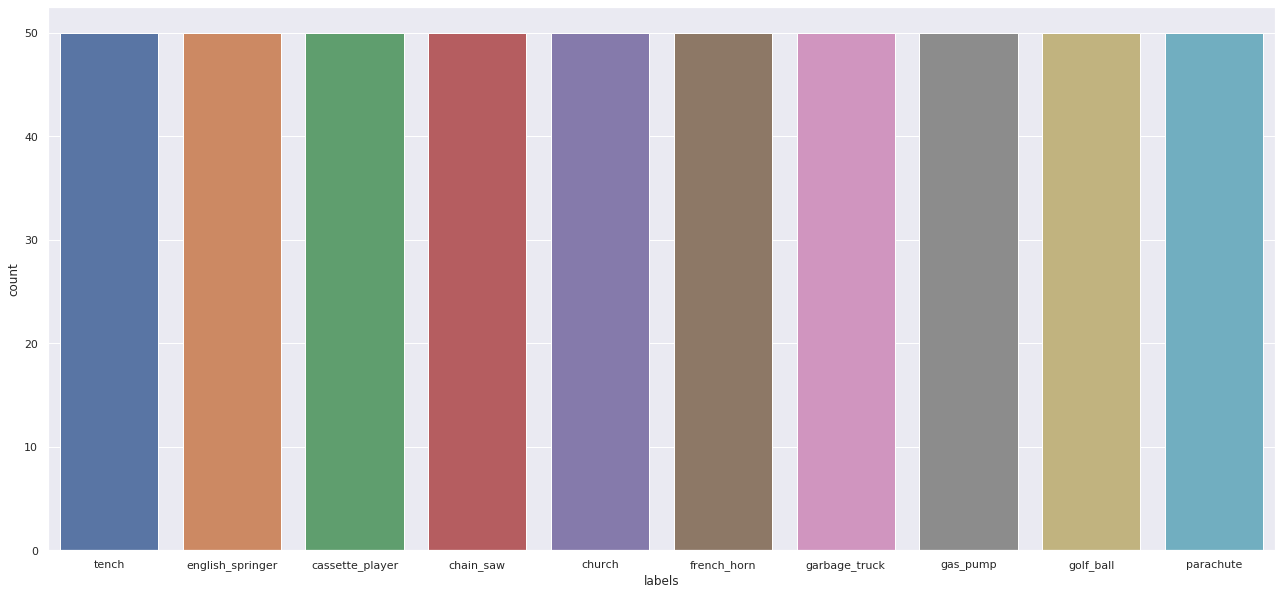

In [16]:
sns.set(rc={'figure.figsize':(22,10)})
sns.barplot(x="labels", y="count", data=val_dataset);